In [115]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
    
from utils import *
from jax_utils import *
import matplotlib.pyplot as plt

In [116]:
calculators = load_calculators_from_pickle("/home/pop518504/git/gknet-benchmarks/benchmarks/oom_analysis/oom_analysis.pickle")
# calculators = load_calculators_from_pickle("/home/pop518504/git/gknet-benchmarks/benchmarks/oom_analysis/old_oom_analysis.pickle")

In [117]:
# group by calculator.short_description -> pair, neighbor list, gnn
# per group, plot parameters in legend  -> all properties, only stress, only stresses, no stress(es), no stress(es) and no jit

In [118]:
labels = set([c.short_description for c in calculators])

all_properties = list(map(lambda c: c.n, filter(lambda c: c._stress and c._stresses, calculators)))
# all_properties = list(map(lambda c: c.n, all_properties))

only_stress = list(map(lambda c: c.n, filter(lambda c: c._stress and not c._stresses, calculators)))
only_stresses = list(map(lambda c: c.n, filter(lambda c: not c._stress and c._stresses, calculators)))
only_energies_and_forces = list(map(lambda c: c.n, filter(lambda c: not c._stress and not c._stresses and c._jit, calculators)))
only_energies_and_forces_no_jit = list(map(lambda c: c.n, filter(lambda c: not c._stress and not c._stresses and not c._jit, calculators)))

# only_stress = list(filter(lambda c: c._stress and not c._stresses, calculators))
#only_stresses = list(filter(lambda c: not c._stress and c._stresses, calculators))
#only_energies_and_forces = list(filter(lambda c: not c._stress and not c._stresses, calculators))
#only_energies_and_forces_no_jit = list(filter(lambda c: not c._stress and not c._stresses and not c._jit, calculators))

<ipython-input-137-582684d3bb19>:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([r + width for r in range(len(all_properties))], ['A', 'B', 'C'])


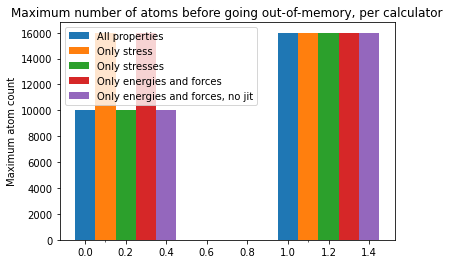

{'JAX-MD Neighbor List', 'JAX-MD Pair'}

In [137]:
width = 0.1  # the width of the bars

r1 = np.arange(len(all_properties))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]

fig, ax = plt.subplots()
bars1 = ax.bar(r1, all_properties, width=width, label='All properties')
bars2 = ax.bar(r2, only_stress, width=width, label='Only stress')
bars3 = ax.bar(r3, only_stresses, width=width, label='Only stresses')
bars4 = ax.bar(r4, only_energies_and_forces, width=width, label='Only energies and forces')
bars5 = ax.bar(r5, only_energies_and_forces_no_jit, width=width, label='Only energies and forces, no jit')

ax.set_title("Maximum number of atoms before going out-of-memory, per calculator")
# ax.set_xlabel("Calculator implementations", fontweight="bold")
ax.set_ylabel("Maximum atom count")

# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])


ax.set_xticks([r + width for r in range(len(all_properties))], ['A', 'B', 'C'])
# ax.set_xticklabels(labels)
ax.legend()

plt.show()

labels



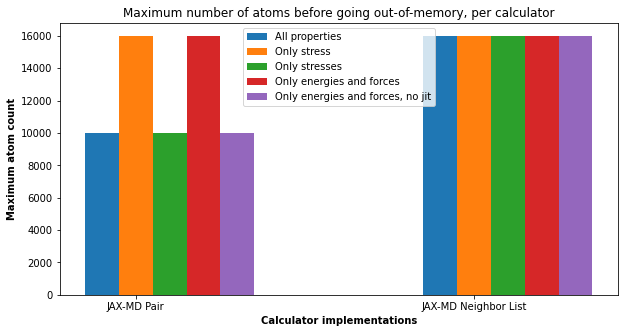

In [146]:
width = 0.1  # the width of the bars

r1 = np.arange(len(all_properties))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]

plt.figure(figsize=(10, 5))

plt.bar(r1, all_properties, width=width, label='All properties')
plt.bar(r2, only_stress, width=width, label='Only stress')
plt.bar(r3, only_stresses, width=width, label='Only stresses')
plt.bar(r4, only_energies_and_forces, width=width, label='Only energies and forces')
plt.bar(r5, only_energies_and_forces_no_jit, width=width, label='Only energies and forces, no jit')

plt.title("Maximum number of atoms before going out-of-memory, per calculator")
plt.xlabel('Calculator implementations', fontweight='bold')
plt.xticks([r + width for r in range(len(all_properties))], labels)
plt.ylabel('Maximum atom count', fontweight='bold')
plt.legend()
plt.show()
# plt.savefig()

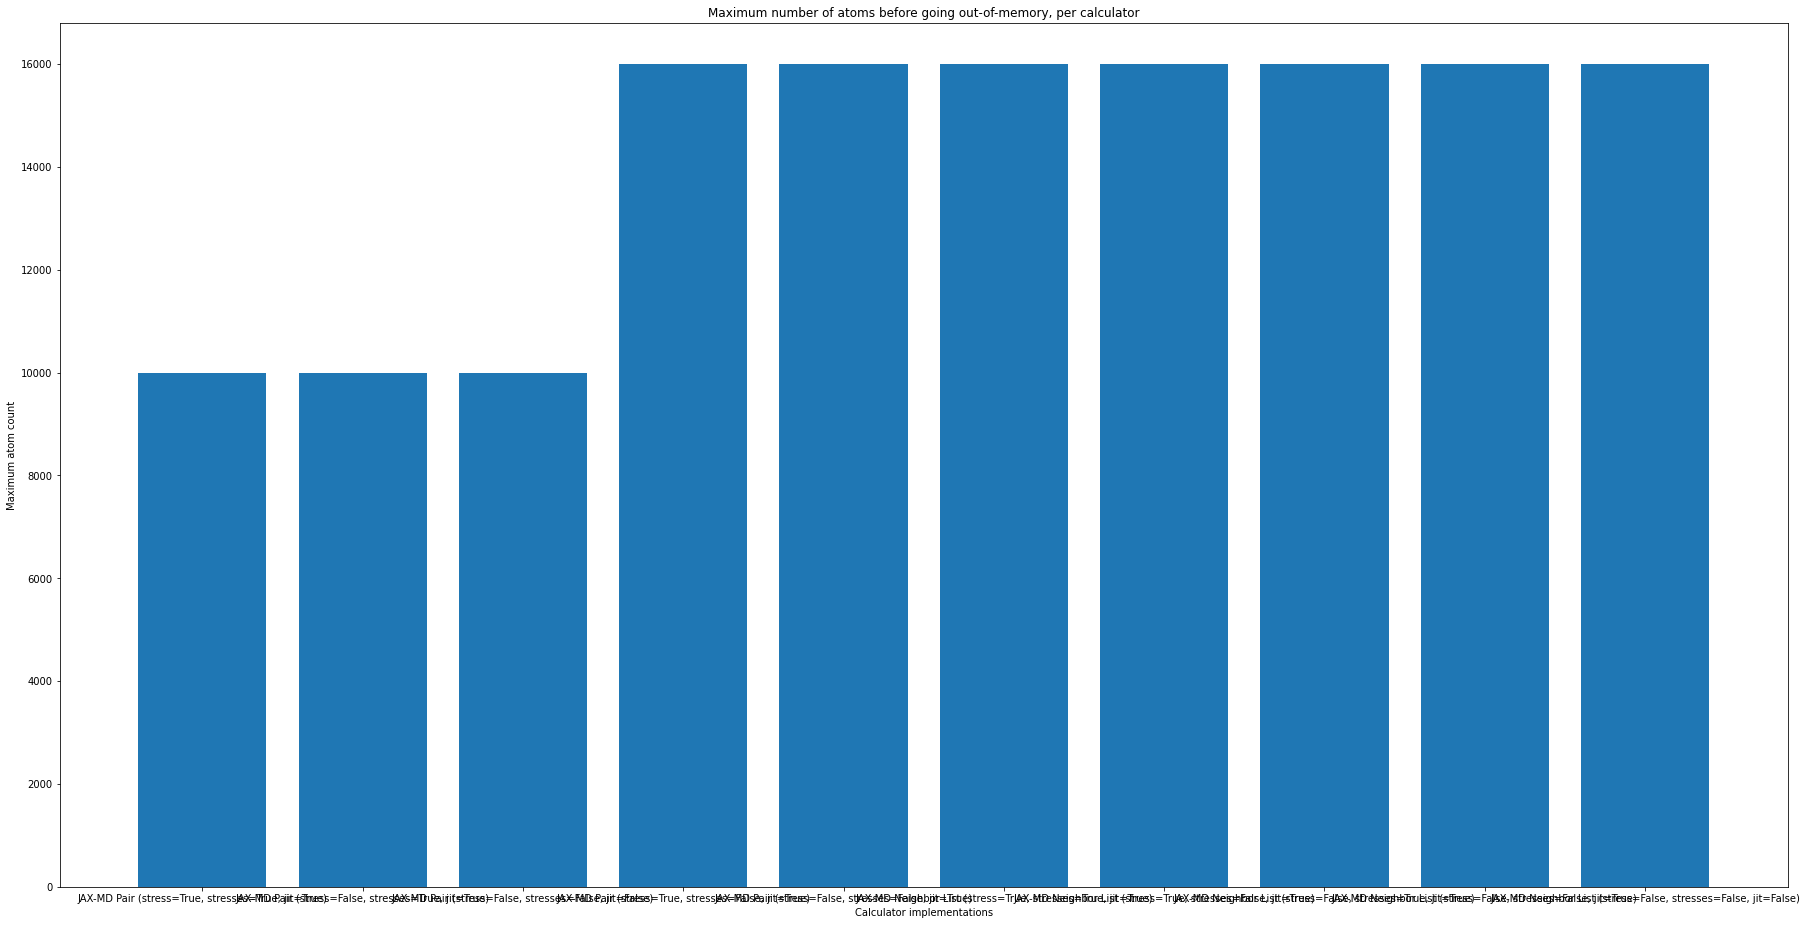

In [67]:

labels = [c.description for c in calculators]
values = [c.n for c in calculators]

calculator_types = set([c.short_description for c in calculators])

fig = plt.figure()
ax = fig.add_axes([0, 0, 4, 3])
ax.bar(labels, values)

ax.set_title("Maximum number of atoms before going out-of-memory, per calculator")
ax.set_xlabel("Calculator implementations")
ax.set_ylabel("Maximum atom count")
# ax.legend()

plt.show()